In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("housing-prices-35.csv")

penser à enlever outliers, normaliser prix, ...

In [58]:
df

,date,position_wgs,x_lbt93,y_lbt93,category,area_living,area_land,n_rooms,shape_wgs,price
0,2020-09-16,POINT (-1.667233132948424 48.10518446058921),352812.796362,6.788576e+06,C,30.0,0.0,1,MULTIPOLYGON (((-1.667524599999999 48.10492969...,120000.0
1,2020-08-05,POINT (-1.580536596330411 48.15039836267523),359546.007545,6.793215e+06,C,67.0,0.0,3,MULTIPOLYGON (((-1.581112699999998 48.15012009...,176000.0
2,2020-01-06,POINT (-1.857796113215682 48.59007145768236),341968.217653,6.843224e+06,H,56.0,2168.0,3,MULTIPOLYGON (((-1.857759199999999 48.58984439...,125000.0
3,2020-01-06,POINT (-1.857796113215682 48.59007145768236),341968.217653,6.843224e+06,H,56.0,2168.0,3,MULTIPOLYGON (((-1.857759199999999 48.58984439...,125000.0
4,2020-05-19,POINT (-1.112155586336285 48.40433431446166),395794.852753,6.819483e+06,H,32.0,891.0,1,MULTIPOLYGON (((-1.111970599999998 48.40436839...,13000.0
...,...,...,...,...,...,...,...,...,...,...
148965,2014-05-23,POINT (-1.652767125798947 48.26774072882553),354951.540436,6.806547e+06,H,71.0,197.0,3,MULTIPOLYGON (((-1.652731299999998 48.26769289...,150000.0
148966,2014-08-25,POINT (-1.669667157578382 48.10047321094859),352601.000568,6.788064e+06,C,76.0,0.0,5,MULTIPOLYGON (((-1.669756299999998 48.10039309...,160000.0
148967,2014-10-31,POINT (-1.495752194612649 48.49006024011159),367989.111346,6.830543e+06,H,75.0,1623.0,1,MULTIPOLYGON (((-1.495579999999999 48.49006269...,55000.0
148968,2014-10-31,POINT (-1.495752194612649 48.49006024011159),367989.111346,6.830543e+06,H,75.0,1623.0,1,MULTIPOLYGON (((-1.495579999999999 48.49006269...,55000.0


In [59]:
df.isnull().sum()

date            0
position_wgs    0
x_lbt93         0
y_lbt93         0
category        0
area_living     0
area_land       0
n_rooms         0
shape_wgs       0
price           0
dtype: int64

In [60]:
df.duplicated().sum()

52222

In [61]:
df2 = df

df2 = df2.drop_duplicates()

df2.duplicated().sum()

0

Text(0, 0.5, 'Fréquence')

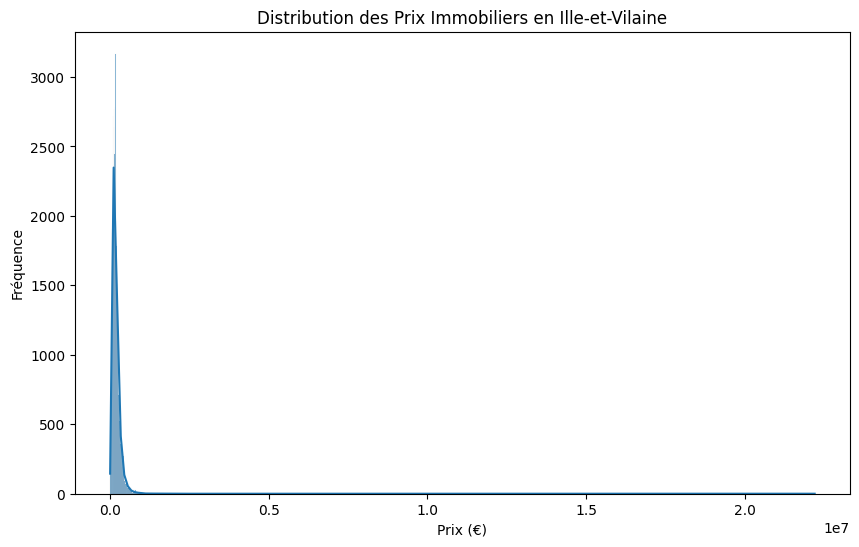

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['price'], kde=True)
plt.title('Distribution des Prix Immobiliers en Ille-et-Vilaine')
plt.xlabel('Prix (€)')
plt.ylabel('Fréquence')

Text(0.5, 1.0, 'Prix par Catégorie de Logement')

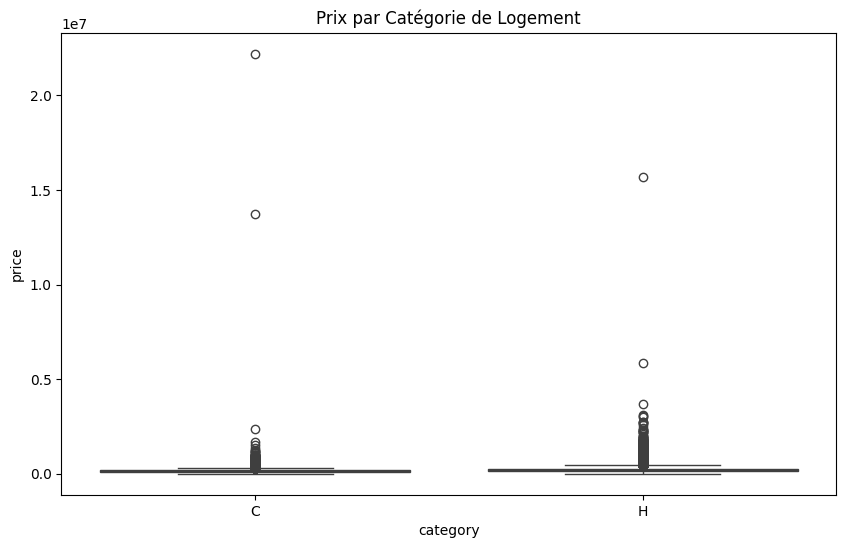

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=df2)
plt.title('Prix par Catégorie de Logement')

Text(0.5, 1.0, 'Prix en Fonction de la Surface Habitable')

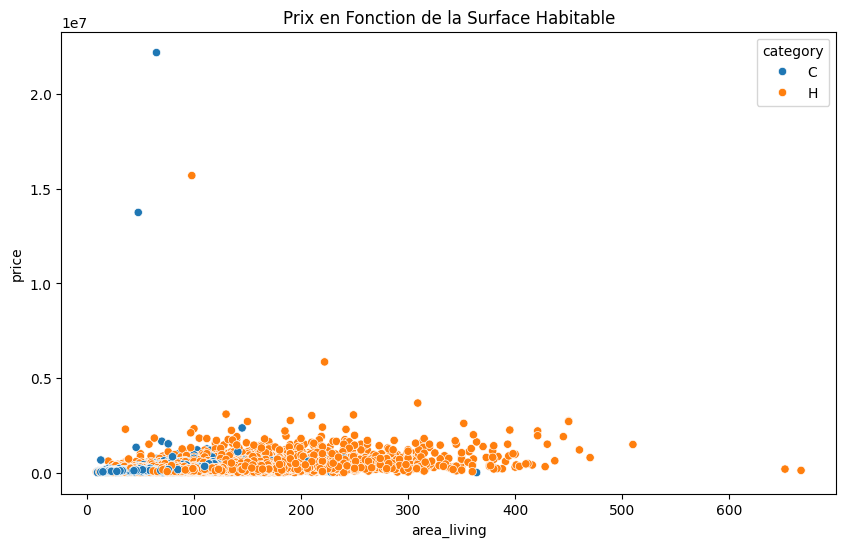

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area_living', y='price', hue='category', data=df2)
plt.title('Prix en Fonction de la Surface Habitable')

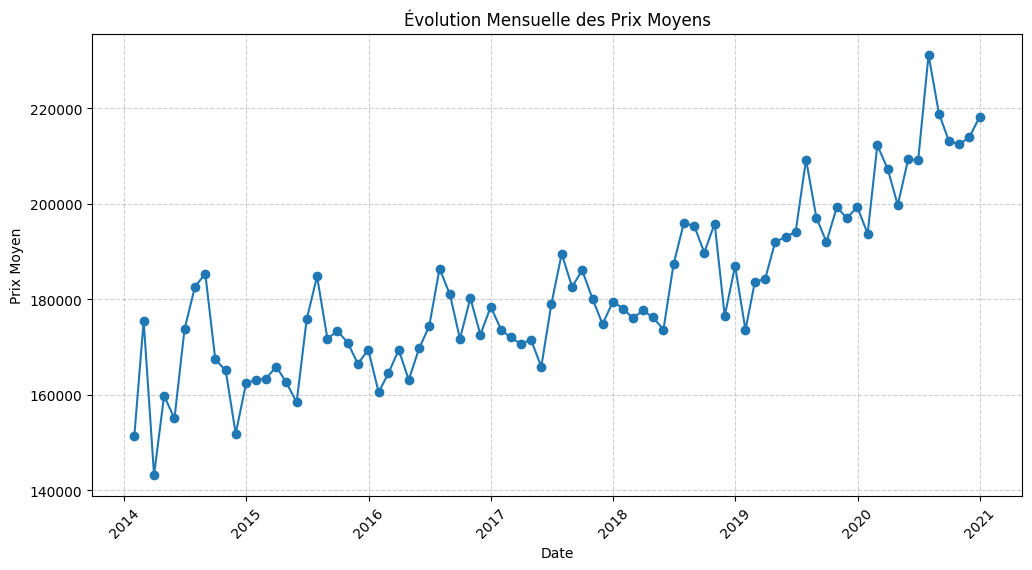

In [65]:
df2.loc[:, 'date'] = pd.to_datetime(df2['date'], errors='coerce')
df_monthly = df2.groupby(pd.Grouper(key='date', freq='M'))['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['date'], df_monthly['price'], marker='o')
plt.title('Évolution Mensuelle des Prix Moyens')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Prix Moyen')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Text(0.5, 1.0, 'Prix en Fonction du Nombre de Pièces')

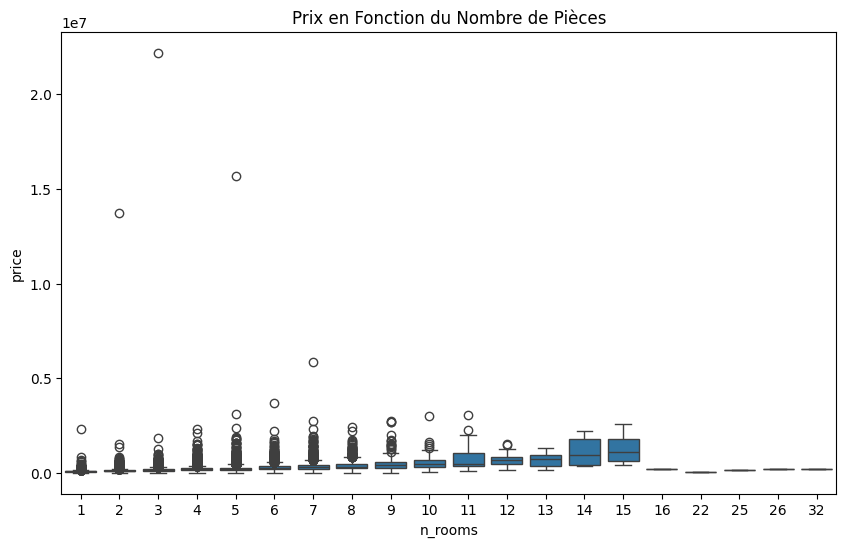

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_rooms', y='price', data=df2)
plt.title('Prix en Fonction du Nombre de Pièces')

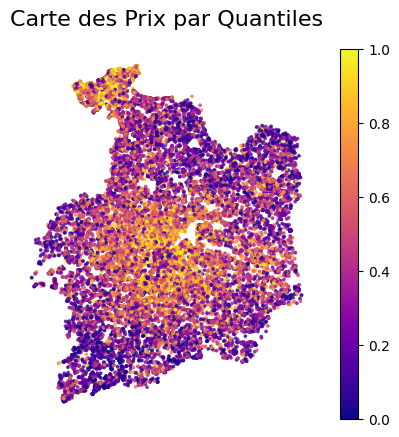

In [67]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='uniform')
gdf['quantile_price'] = transformer.fit_transform(gdf[['price']])
ax = gdf.plot(column='quantile_price', cmap='plasma', legend=True, markersize=3, alpha=0.7)
ax.set_title('Carte des Prix par Quantiles', fontsize=16)
ax.set_axis_off()
plt.show()

When you know France, it is logical that the highest prices are grouped around the large city of Rennes and around the seaside resort of Saint Malo (in the north)

In [68]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_ml = df2.drop(['position_wgs', 'shape_wgs'], axis=1)
df_ml = df_ml.sort_values('date')
df_ml['date_encoded'] = range(len(df_ml))
df_ml = df_ml.drop('date', axis=1)

label_encoder = LabelEncoder()
df_ml['category_encoded'] = label_encoder.fit_transform(df_ml['category'])
df_ml = df_ml.drop('category', axis=1)

colonnes_a_normaliser = ['x_lbt93', 'y_lbt93', 'area_living', 'area_land', 'n_rooms']

scaler = StandardScaler()
df_ml[colonnes_a_normaliser] = scaler.fit_transform(df_ml[colonnes_a_normaliser])

X = df_ml.drop('price', axis=1)
y = df_ml['price']

Text(0.5, 1.0, 'Matrice de Corrélation')

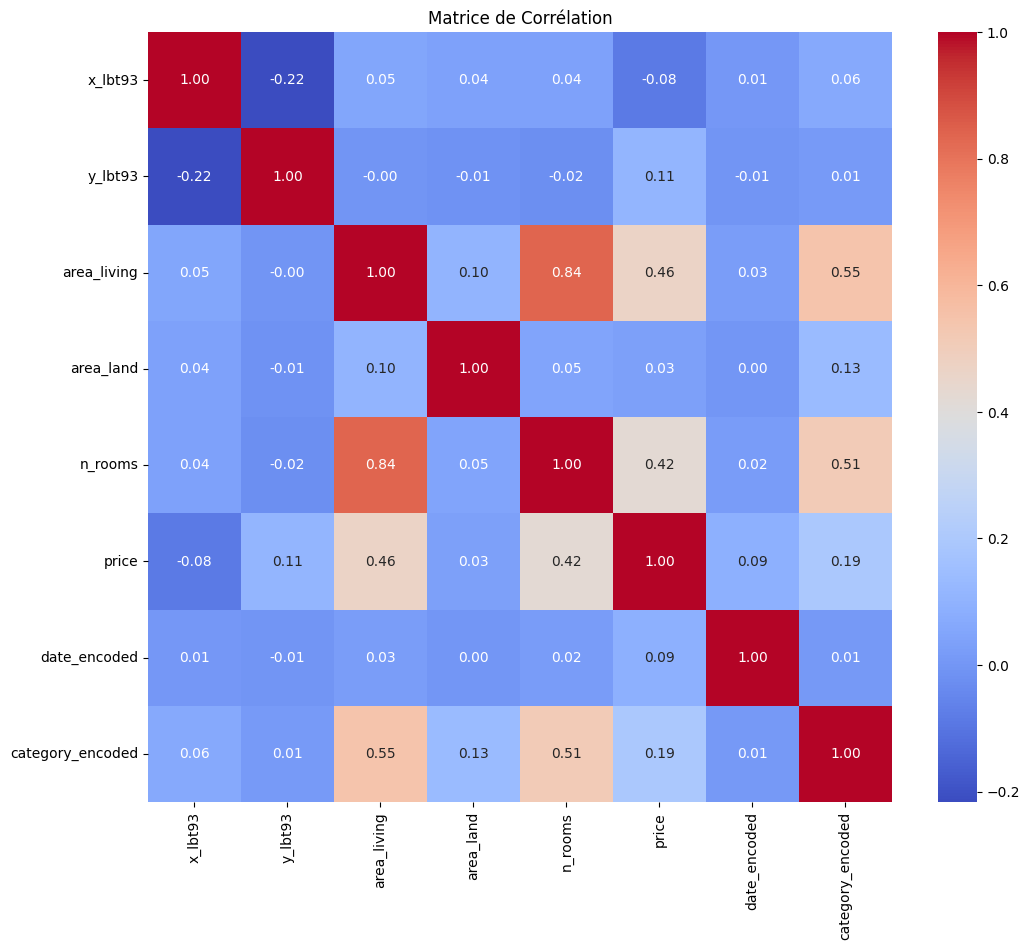

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_ml.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ri = Ridge()
ri.fit(X_train, y_train)
y_pred_ri = ri.predict(X_test)

la = Lasso()
la.fit(X_train, y_train)
y_pred_la = la.predict(X_test)

print("Régression Linéaire:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R2: {r2_score(y_test, y_pred_lr)}")

print("Ridge:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ri)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ri)}")
print(f"R2: {r2_score(y_test, y_pred_ri)}")

print("Lasso:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_la)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_la)}")
print(f"R2: {r2_score(y_test, y_pred_la)}")

Régression Linéaire:
MAE: 62463.867993646716
MSE: 11110234168.517084
R2: 0.3988599701918537
Ridge:
MAE: 62463.826467984516
MSE: 11110245463.219095
R2: 0.3988593590708457
Lasso:
MAE: 62463.66794743378
MSE: 11110252103.790522
R2: 0.3988589997702905


In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R2: {r2_score(y_test, y_pred_rf)}")

Random Forest:
MAE: 38363.594127178294
MSE: 5617448228.030914
R2: 0.6960574418122328


In [72]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("XGBoost:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R2: {r2_score(y_test, y_pred_gb)}")

XGBoost:
MAE: 45842.344125723386
MSE: 6584450199.867657
R2: 0.6437359888745704


In [73]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVM:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_svr)}")
print(f"R2: {r2_score(y_test, y_pred_svr)}")

SVM:
MAE: 83609.31243110783
MSE: 19263535862.317616
R2: -0.042289689563720145


In [74]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 1.0/101.7 MB 7.1 MB/s eta 0:00:15
    --------------------------------------- 1.8/101.7 MB 5.3 MB/s eta 0:00:19
   - -------------------------------------- 2.6/101.7 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 3.4/101.7 MB 4.3 MB/s eta 0:00:23
   - -------------------------------------- 4.2/101.7 MB 4.1 MB/s eta 0:00:24
   - -------------------------------------- 4.7/101.7 MB 4.0 MB/s eta 0:00:25
   -- ------------------------------------- 5.5/101.7 MB 3.9 MB/s eta 0:00:25
   -- ------------------------------------- 6.3/101.7 MB 3.9 MB/s eta 0:00:25
   -- ------------------------------------- 7.1/101.7 MB 3.9 MB/s eta 0:00:25
   --- ------------------------------------ 7.9/101.7 MB 3.8 MB/s eta 0:00:25
   --- ------------------------------------ 8.7/101.7 MB 3.8 MB/s eta 0:00:25
   --- ------------------------------------ 8.9/101.7 MB 3.8 MB/s eta 0

In [75]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_seed=42, verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

print("CatBoost:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_cat)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_cat)}")
print(f"R2: {r2_score(y_test, y_pred_cat)}")

CatBoost:
MAE: 40064.95407073147
MSE: 9928323066.559774
R2: 0.46280948415210066


In [76]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------------- ---------- 1.0/1.4 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.9 MB/s eta 0:00:00


In [77]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lgbm)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lgbm)}")
print(f"R2: {r2_score(y_test, y_pred_lgbm)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 77398, number of used features: 7
[LightGBM] [Info] Start training from score 184447.811867
LightGBM:
MAE: 41018.874273348
MSE: 5341489196.25905
R2: 0.7109887221137089
